### Random Forest Regression: Overview

Random Forest Regression is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the average of the predictions of the individual trees. This method enhances the predictive accuracy and controls overfitting compared to individual decision trees.

1. **Decision Trees**: 
   - **Nodes and Splits**: In a decision tree, the dataset is split into subsets based on the feature that results in the most homogeneous subsets.
   - **Splitting Criteria**: Common criteria include Mean Squared Error (MSE) for regression tasks.
   - **Leaf Nodes**: The terminal nodes of a tree that contain the prediction value.

2. **Ensemble Learning**:
   - **Bootstrap Aggregating (Bagging)**: Random subsets of the original dataset are created with replacement (bootstrapping), and each subset is used to train a decision tree.
   - **Random Feature Selection**: At each split in the tree, a random subset of features is considered for splitting, which helps in making the trees less correlated.

3. **Aggregation**:
   - **Averaging**: The final prediction of the random forest is obtained by averaging the predictions from all the individual trees.

### Example Data: Government Public Domain

Let's consider an example where we predict the expenditure of different government departments based on several factors.

#### Example Data
| Department | Budget (in million $) | Staff Count | Projects Count | Avg Project Duration (months) |
|------------|-----------------------|-------------|----------------|------------------------------|
| Health     | 500                   | 2000        | 10             | 24                           |
| Education  | 300                   | 1500        | 7              | 18                           |
| Defense    | 1500                  | 5000        | 15             | 36                           |
| Transport  | 700                   | 3000        | 12             | 30                           |
| Agriculture| 200                   | 1200        | 5              | 12                           |
| ...        | ...                   | ...         | ...            | ...                          |

### Random Forest Regression

1. **Training Decision Trees**:
   - **Bootstrap Sample**: Randomly select subsets of data with replacement.
   - **Feature Subset**: Randomly select a subset of features for each split.
   - **Splitting**: Use MSE to determine the best split.

2. **Prediction**:
   - **Individual Trees**: Each tree provides a prediction.
   - **Aggregation**: Average the predictions of all the trees.

### Implementation

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [47]:
# Seed for reproducibility
np.random.seed(42)

# Generate logical synthetic dataset
num_samples = 100
staff_count = np.random.randint(500, 5000, num_samples)
projects_count = np.random.randint(1, 20, num_samples)
avg_project_duration = np.random.randint(6, 48, num_samples)

# Logical relationship: Budget is influenced by staff_count, projects_count, and avg_project_duration
budget = (staff_count * 0.5 + projects_count * 100 + avg_project_duration * 50) + np.random.normal(0, 100, num_samples)

data = {
    'Department': np.random.choice(['Health', 'Education', 'Defense', 'Transport', 'Agriculture'], num_samples),
    'Staff Count': staff_count,
    'Projects Count': projects_count,
    'Avg Project Duration': avg_project_duration,
    'Budget': budget
}

In [48]:
# Create a DataFrame
df = pd.DataFrame(data)

In [49]:
# Features and target variable
X = df[['Staff Count', 'Projects Count', 'Avg Project Duration']]
y = df['Budget']

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
# Predictions
y_pred = rf.predict(X_test)

In [53]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R Squared: {r2}')

Mean Squared Error: 80713.93028161606
R Squared: 0.9264748302263259


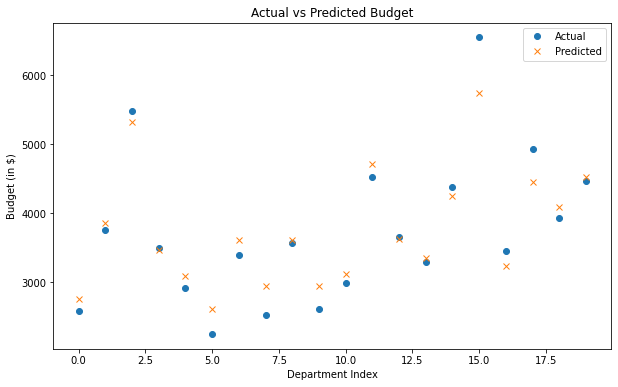

In [54]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, marker='o', linestyle='', label='Actual')
plt.plot(range(len(y_pred)), y_pred, marker='x', linestyle='', label='Predicted')
plt.title('Actual vs Predicted Budget')
plt.xlabel('Department Index')
plt.ylabel('Budget (in $)')
plt.legend()
plt.show()